# Pre-processing

In [1]:
import pandas as pd

In [2]:
in_data = pd.read_csv("../data/combined_dataset_0406.xlsx - combined_dataset_0406.csv")

In [10]:
in_data = in_data[['enterprise_name',
'size',
'business_started_year',
'market_type',
'road_type',
'type',
'investment.amount',
'stock_value',
'New.Monthly.Sales',
'Total.Population.of.Village',
'District.Head.Quarter...Distance.in.km.',
'Nearest.Statutory.Town..Distance.in.km.',
'Agriculture',
'Light.and.Fuel',
'Credit/Deposit',
'MICA',
'Avg.Demand.x',
'Avg.Demand.y']]

In [11]:
# available data
with pd.option_context("display.max_rows", 1000): 
    print(in_data.describe(include='all').loc['count']/in_data.shape[0])

enterprise_name                                   1
size                                              1
business_started_year                      0.975817
market_type                                0.956954
road_type                                         1
type                                       0.930422
investment.amount                          0.935742
stock_value                                0.998273
New.Monthly.Sales                                 1
Total.Population.of.Village                0.912527
District.Head.Quarter...Distance.in.km.    0.912527
Nearest.Statutory.Town..Distance.in.km.    0.912527
Agriculture                                0.999931
Light.and.Fuel                             0.999931
Credit/Deposit                             0.978581
MICA                                       0.999931
Avg.Demand.x                               0.758239
Avg.Demand.y                               0.415049
Name: count, dtype: object


In [12]:
in_data.head()

,enterprise_name,size,business_started_year,market_type,road_type,type,investment.amount,stock_value,New.Monthly.Sales,Total.Population.of.Village,District.Head.Quarter...Distance.in.km.,Nearest.Statutory.Town..Distance.in.km.,Agriculture,Light.and.Fuel,Credit/Deposit,MICA,Avg.Demand.x,Avg.Demand.y
0,Agarbattitrading,medium,4.38,Stand Alone,Major Road,fixed,248892.70880,NaN,90909.09091,1563.746032,121.190476,55.460317,5.0859,3.0462,0.578707,53.77,661.658158,NaN
1,Aluminiumworks,small,23.39,Small Market,Village Road,fixed,15971.74247,NaN,24000.00000,643.015625,126.500000,124.859375,2.5333,1.6213,NaN,41.59,779.906283,NaN
2,Automobileancillary,medium,8.25,Stand Alone,National Highway,fixed,NaN,100000.0,80000.00000,1134.244444,23.600000,23.600000,20.6134,1.4150,0.787072,19.59,1318.973605,NaN
3,Automobileancillary,medium,22.25,Small Market,Major Road,fixed,NaN,700000.0,90000.00000,1134.244444,23.600000,23.600000,20.6134,1.4150,0.787072,19.59,1318.973605,NaN
4,Automobileancillary,small,20.25,Small Market,Village Road,fixed,NaN,3000.0,10000.00000,1382.215686,51.941176,14.333333,20.6134,1.4150,0.787072,19.59,NaN,NaN


In [15]:
import numpy as np

msk = np.random.rand(len(in_data)) < 0.8

train = in_data[msk]

test = in_data[~msk]

In [16]:
train.head()

,enterprise_name,size,business_started_year,market_type,road_type,type,investment.amount,stock_value,New.Monthly.Sales,Total.Population.of.Village,District.Head.Quarter...Distance.in.km.,Nearest.Statutory.Town..Distance.in.km.,Agriculture,Light.and.Fuel,Credit/Deposit,MICA,Avg.Demand.x,Avg.Demand.y
0,Agarbattitrading,medium,4.38,Stand Alone,Major Road,fixed,248892.70880,NaN,90909.09091,1563.746032,121.190476,55.460317,5.0859,3.0462,0.578707,53.77,661.658158,NaN
1,Aluminiumworks,small,23.39,Small Market,Village Road,fixed,15971.74247,NaN,24000.00000,643.015625,126.500000,124.859375,2.5333,1.6213,NaN,41.59,779.906283,NaN
3,Automobileancillary,medium,22.25,Small Market,Major Road,fixed,NaN,700000.0,90000.00000,1134.244444,23.600000,23.600000,20.6134,1.4150,0.787072,19.59,1318.973605,NaN
4,Automobileancillary,small,20.25,Small Market,Village Road,fixed,NaN,3000.0,10000.00000,1382.215686,51.941176,14.333333,20.6134,1.4150,0.787072,19.59,NaN,NaN
5,Automobileancillary,small,10.08,Large Market,Major Road,fixed,NaN,100000.0,15000.00000,4951.214286,95.714286,22.428571,43.9511,2.1173,1.358157,35.00,NaN,NaN


In [17]:
train.shape

(11675, 18)

In [18]:
test.shape

(2798, 18)

In [19]:
train.columns

Index([u'enterprise_name', u'size', u'business_started_year', u'market_type',
       u'road_type', u'type', u'investment.amount', u'stock_value',
       u'New.Monthly.Sales', u'Total.Population.of.Village',
       u'District.Head.Quarter...Distance.in.km.',
       u'Nearest.Statutory.Town..Distance.in.km.', u'Agriculture',
       u'Light.and.Fuel', u'Credit/Deposit', u'MICA', u'Avg.Demand.x',
       u'Avg.Demand.y'],
      dtype='object')

In [28]:
set(train.columns)- set(train._get_numeric_data().columns)

{'enterprise_name', 'market_type', 'road_type', 'size', 'type'}

In [27]:
numeric_cols = [u'business_started_year', u'investment.amount', u'stock_value', u'Total.Population.of.Village',
       u'District.Head.Quarter...Distance.in.km.',
       u'Nearest.Statutory.Town..Distance.in.km.', u'Agriculture',
       u'Light.and.Fuel', u'Credit/Deposit', u'MICA', u'Avg.Demand.x',
       u'Avg.Demand.y']

In [29]:
categorical_cols = ['enterprise_name', 'market_type', 'road_type', 'size', 'type']

In [30]:
from sklearn.base import TransformerMixin
import pandas as pd
import numpy as np

In [31]:
class DFMissingNum(TransformerMixin):
    '''
    Replaces missing values by input value or method.Below are the methods available. 
    'mean': replace missing values using the mean.
    'median': replace missing values using the median
    'most_frequent': replace missing values using the mode
    'backfill' or 'bfill': use NEXT valid observation to fill gap.
    'pad' or 'ffill': propagate last valid observation forward to next valid.
    Numeric value: Replaces with the input value
    Ex: repalce = ""mean"" for replacing with mean, replace = 0 for replacing with the numeric 0
    Note: No quotes for numeric values
    '''
    def __init__(self,replace):
        self.replace = replace
        self.imp = None
        self.statistics_ = None        
        
    def fit(self,X,y=None): 
         
        if type(self.replace) == dict:
            for key, value in self.replace.iteritems():
                if value in ['mean','median','most_frequent']:
                    self.replace[key] = _Impute(value= value,S=X[key])
            
        elif self.replace in ['mean','median','most_frequent']:
            self.imp = DFImputer(strategy=self.replace)
            self.imp.fit(X)
            self.statistics_ = pd.Series(self.imp.statistics_, index=X.columns)
        return self    
    
    def transform(self,X):
        if self.replace in ['mean','median','most_frequent']:
            Ximp = self.imp.transform(X)
            X_replaced = pd.DataFrame(Ximp, index=X.index, columns=X.columns)
        
        elif self.replace in ['backfill','bfill','pad','ffill']:
            X_replaced = X.fillna(method=self.replace)
        
        elif type(self.replace) == dict:
            X_replaced = X.copy()
            for key, value in self.replace.iteritems():
                if value in ['backfill','bfill','pad','ffill']:
                    X_replaced[key] = X_replaced[key].fillna(method=value)
                else:
                    X_replaced[key] = X_replaced[key].fillna(value=value)
        else:
            X_replaced = X.fillna(value=self.replace)
        return X_replaced

In [32]:
class DFMissingStr(TransformerMixin):
    '''
    METHODS
    most_frequent:
    backfill/bfill:
    pad/ffill:
    '''
    def __init__(self,replace):
        self.replace = replace
        self.statistics_ = None
    def fit(self,X,y=None):
        
        if type(self.replace) == dict:
            for key, value in self.replace.iteritems():
                if value == 'most_frequent':
                    self.replace[key] = X[key].mode()[0]
        elif self.replace =='most_frequent':
            self.statistics_= X.mode().to_dict()
            for key,value in self.statistics_.items():
                self.statistics_[key] = value.values()[0]

        return self    
    def transform(self,X):
        if self.replace == 'most_frequent':
            X_replaced= X.fillna(self.statistics_)
        
        elif self.replace in ['backfill','bfill','pad','ffill']:
            X_replaced = X.fillna(method=self.replace)
            
        elif type(self.replace) == dict:
            X_replaced = X.copy()
            for key, value in self.replace.iteritems():
                if value in ['backfill','bfill','pad','ffill']:
                    X_replaced[key] = X_replaced[key].fillna(method=value)
                else:
                    X_replaced[key] = X_replaced[key].fillna(value=value)
        else:
            X_replaced = X.fillna(value=self.replace)
        return X_replaced

In [33]:
class DFOneHot(TransformerMixin):
    '''
    dummy_na: Unseeen values Boolean
    reference - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
    '''
    
    def __init__(self,dummy_na=False):
        self.dummy_na=dummy_na
        self.categories_ = {}
    
    def fit(self, X, y=None):
        for col in list(X):
            self.categories_[col] = X[col].unique()
        return self
    
    def transform(self,X):
        X_new = X.copy()
        for colname, levels in self.categories_.iteritems():
            X_new[colname][~X_new[colname].isin(levels)] = np.NaN
        X_dummy = pd.get_dummies(X_new,dummy_na=self.dummy_na)
        
        fit_colnames = []
        for colname, levels in self.categories_.iteritems():
            for level in levels:
                fit_colnames.append(str(colname)+'_'+str(level))
        
        X_dummy = X_dummy.reindex(columns= fit_colnames, fill_value= 0)
        
        return X_dummy


In [34]:
class ColumnExtractor(TransformerMixin):

    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xcols = pd.DataFrame(X[self.cols])
        return Xcols

In [35]:
class DFFeatureUnion(TransformerMixin):
    # FeatureUnion but for pandas DataFrames

    def __init__(self, transformer_list):
        self.transformer_list = transformer_list
        print "Feature union successfully initiated."

    def fit(self, X, y=None):
        for (name, t) in self.transformer_list:
            t.fit(X, y)

        print "Feature union - successful fit."
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xts = [t.transform(X) for _, t in self.transformer_list]
        Xunion = reduce(lambda X1, X2: pd.merge(X1, X2, left_index=True, right_index=True), Xts)
        print "Feature union - successful transform."
        return Xunion

In [36]:
from sklearn.preprocessing import Imputer
class DFImputer(TransformerMixin):
    # Imputer but for pandas DataFrames

    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imp = None
        self.statistics_ = None

    def fit(self, X, y=None):
        self.imp = Imputer(strategy=self.strategy)
        self.imp.fit(X)
        self.statistics_ = pd.Series(self.imp.statistics_, index=X.columns)
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Ximp = self.imp.transform(X)
        Xfilled = pd.DataFrame(Ximp, index=X.index, columns=X.columns)
        return Xfilled


In [37]:
from sklearn.pipeline import Pipeline

In [38]:
preprocess = Pipeline([("features",DFFeatureUnion([
    ("numeric",Pipeline([("num_sel",ColumnExtractor(numeric_cols)),("num_impute",DFMissingNum(replace='median'))])),
    ("categorical",Pipeline([("cat_sel",ColumnExtractor(categorical_cols)),("str_impute",DFMissingStr(replace='most_frequent')),("one_hot",DFOneHot())]))
]))])

Feature union successfully initiated.


In [39]:
processed_train = preprocess.fit_transform(train)

Feature union - successful fit.
Feature union - successful transform.


In [40]:
processed_test = preprocess.transform(test)

Feature union - successful transform.


In [41]:
processed_train.head()

,business_started_year,investment.amount,stock_value,Total.Population.of.Village,District.Head.Quarter...Distance.in.km.,Nearest.Statutory.Town..Distance.in.km.,Agriculture,Light.and.Fuel,Credit/Deposit,MICA,...,enterprise_name_Stationaryshop,enterprise_name_Studio,enterprise_name_Sweetstrading,enterprise_name_Tenthouse,enterprise_name_UtensilsVesselstrading,enterprise_name_Garmentsmanufacturing,enterprise_name_zariworkLadysboutique,size_medium,size_small,size_large
0,4.38,248892.70880,15000.0,1563.746032,121.190476,55.460317,5.0859,3.0462,0.578707,53.77,...,0,0,0,0,0,0,0,1,0,0
1,23.39,15971.74247,15000.0,643.015625,126.500000,124.859375,2.5333,1.6213,0.520817,41.59,...,0,0,0,0,0,0,0,0,1,0
3,22.25,16981.56798,700000.0,1134.244444,23.600000,23.600000,20.6134,1.4150,0.787072,19.59,...,0,0,0,0,0,0,0,1,0,0
4,20.25,16981.56798,3000.0,1382.215686,51.941176,14.333333,20.6134,1.4150,0.787072,19.59,...,0,0,0,0,0,0,0,0,1,0
5,10.08,16981.56798,100000.0,4951.214286,95.714286,22.428571,43.9511,2.1173,1.358157,35.00,...,0,0,0,0,0,0,0,0,1,0


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [43]:
tree_reg = DecisionTreeRegressor(max_depth=2,)

In [44]:
X = processed_train.values

In [46]:
y = train['New.Monthly.Sales']

In [93]:
scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -4427905408.38 (+/- 5783733834.32)


In [111]:
print('RMSE: {}').format(sqrt(4427905408.38))

RMSE: 66542.5082814


# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_reg0 = RandomForestRegressor(max_depth=2, random_state=0)

In [98]:
scores = cross_val_score(rf_reg0, X, y, scoring='neg_mean_squared_error', cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -4125410436.85 (+/- 5875102951.68)


In [112]:
print('RMSE: {}').format(sqrt(4125410436))

RMSE: 64229.3580538


## hyper-parameter tuning - random search cv

In [50]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 126.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [53]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [54]:
rf_random.best_score_

0.4926250490175154

In [95]:
rf_reg1 = RandomForestRegressor(**rf_random.best_params_)

In [96]:
scores = cross_val_score(rf_reg1, X, y, scoring='neg_mean_squared_error', cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -3308096807.11 (+/- 5360264829.28)


In [113]:
print('RMSE: {}').format(sqrt(3308096807))

RMSE: 57516.0569493


# Boosted trees (XGBoost)

In [57]:
from xgboost import XGBRegressor

In [127]:
xgb_reg = XGBRegressor()

In [128]:
scores = cross_val_score(xgb_reg, X, y, scoring='neg_mean_squared_error', cv=10)

In [129]:
scoreses

array([-4.30354213e+09, -2.74032535e+09, -2.33870629e+09, -1.14566670e+09,
       -1.38926900e+09, -9.15822865e+09, -2.51801281e+09, -2.70847498e+08,
       -3.23177061e+09, -3.06040110e+09])

In [118]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -3015677014.49 (+/- 4643112836.74)


In [119]:
print('RMSE: {}').format(sqrt(3015677014.49))

RMSE: 54915.1801826


## hyper-parameter tuning - grid search cv

In [60]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb_reg.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [120]:
# grid search
model = XGBRegressor()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.9min finished


Best: -2553617175.053390 using {'n_estimators': 200, 'max_depth': 8}
-3242925458.714771 (975918734.755049) with: {'n_estimators': 50, 'max_depth': 2}
-3014038518.623384 (928239888.961434) with: {'n_estimators': 100, 'max_depth': 2}
-2894810364.077070 (903490300.280235) with: {'n_estimators': 150, 'max_depth': 2}
-2823028940.632756 (888124499.315609) with: {'n_estimators': 200, 'max_depth': 2}
-2954720462.817352 (984362026.906741) with: {'n_estimators': 50, 'max_depth': 4}
-2756290338.477518 (889244651.099793) with: {'n_estimators': 100, 'max_depth': 4}
-2697621470.844778 (843261754.959438) with: {'n_estimators': 150, 'max_depth': 4}
-2661618925.004450 (815147347.913305) with: {'n_estimators': 200, 'max_depth': 4}
-2782992148.491127 (977010653.169311) with: {'n_estimators': 50, 'max_depth': 6}
-2652152102.629840 (950110516.960483) with: {'n_estimators': 100, 'max_depth': 6}
-2601809370.455069 (937934336.851645) with: {'n_estimators': 150, 'max_depth': 6}
-2574752491.330619 (909953401.96

In [121]:
grid_result.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [122]:
grid_result.best_score_

-2553617175.0533895

In [123]:
xgb_reg = XGBRegressor(max_depth=8, n_estimators=200)
scores = cross_val_score(xgb_reg, X, y, scoring='neg_mean_squared_error', cv=10)

In [126]:
scores

array([-3.70900167e+09, -2.89287030e+09, -2.49517617e+09, -1.20639627e+09,
       -2.47721589e+09, -9.00444753e+09, -2.02917764e+09, -2.16416603e+08,
       -3.98909121e+09, -2.73719154e+09])

In [124]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -3075698482.12 (+/- 4471850381.59)


In [125]:
print('RMSE: {}').format(sqrt(3075698482.12))

RMSE: 55458.9801756


In [ ]:
#TODO regularization to improve model generalization

In [133]:
param_test = {
 'gamma':[i/20.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(max_depth=8, n_estimators=200,gamma= 0, seed=27), 
param_grid = param_test, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, -3350508132.9554677)

In [135]:
param_test1 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(max_depth=8, n_estimators=200,gamma= 0, seed=27), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.1}, -3350507891.883827)

In [136]:
param_test2 = {
 'reg_alpha':[0.01, 0.05, 0.1, 0.15, 0.2]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(max_depth=8, n_estimators=200,gamma= 0, seed=27), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.2}, -3350507681.321519)

In [137]:
param_test2 = {
 'reg_alpha':[0.2, 0.25, 0.3, 0.35, 0.4]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(max_depth=8, n_estimators=200,gamma= 0, seed=27), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.2}, -3350507681.321519)

In [138]:
xgb_reg = XGBRegressor(max_depth=8, n_estimators=200,gamma= 0, reg_alpha=0.2, seed=27)
scores = cross_val_score(xgb_reg, X, y, scoring='neg_mean_squared_error', cv=10)

In [139]:
scores

array([-3.70900159e+09, -2.90003423e+09, -2.55219059e+09, -1.20639604e+09,
       -2.47721553e+09, -9.00444729e+09, -2.02917727e+09, -2.16416600e+08,
       -3.98909116e+09, -2.73719140e+09])

In [140]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -3082116169.71 (+/- 4468900896.00)


In [141]:
print('RMSE: {}').format(sqrt(3082116169.71))

RMSE: 55516.8097941


# Scoring

In [142]:
xgb_reg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=1)

In [143]:
predictions = xgb_reg.predict(processed_test.values)

In [144]:
predictions

array([39135.11 , 64347.684, 79425.79 , ..., 40858.53 , 21551.861,
       17312.406], dtype=float32)

In [145]:
test['predictions'] = pd.Series(predictions, index=test.index)

/home/sanjay/code/.virtualenvs/impact/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
test.head()

,enterprise_name,size,business_started_year,market_type,road_type,type,investment.amount,stock_value,New.Monthly.Sales,Total.Population.of.Village,...,Nearest.Statutory.Town..Distance.in.km.,Agriculture,Light.and.Fuel,Credit/Deposit,MICA,Avg.Demand.x,Avg.Demand.y,predictions,error,abs_error
2,Automobileancillary,medium,8.25,Stand Alone,National Highway,fixed,NaN,100000.0,80000.0,1134.244444,...,23.600000,20.6134,1.4150,0.787072,19.59,1318.973605,NaN,39135.109375,-36585.589844,36585.589844
19,Bakery,medium,4.38,Small Market,Major Road,fixed,77236.59780,32500.0,65000.0,1563.746032,...,55.460317,5.0859,3.0462,0.578707,53.77,661.658158,NaN,64347.683594,-984.148438,984.148438
25,Bakery,medium,3.08,Small Market,Major Road,fixed,47511.07000,100000.0,40000.0,6071.100000,...,19.000000,43.9511,2.1173,1.358157,35.00,NaN,NaN,79425.789062,39030.296875,39030.296875
40,Bakery,medium,43.41,Large Market,State Highway,fixed,41395.12927,75000.0,150000.0,1563.746032,...,55.460317,5.0859,3.0462,0.578707,53.77,661.658158,NaN,86707.687500,-63990.820312,63990.820312
43,Bakery,small,2.33,Small Market,Village Road,fixed,563265.31000,20000.0,60000.0,1282.725490,...,20.666667,20.6134,1.4150,0.787072,19.59,NaN,NaN,52037.136719,-9432.140625,9432.140625


In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, targets):
    return sqrt(mean_squared_error(predictions, targets))

rmse_val = rmse(np.array(test['New.Monthly.Sales']), np.array(test['predictions']))
print("rms error is: " + str(rmse_val))

rms error is: 45226.4835289


In [148]:
test['error'] = test['predictions']-test['New.Monthly.Sales']

/home/sanjay/code/.virtualenvs/impact/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
test['abs_error'] = abs(test['error'])

/home/sanjay/code/.virtualenvs/impact/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
test['New.Monthly.Sales'].describe()

count    2.798000e+03
mean     4.218619e+04
std      9.165399e+04
min      3.000000e+03
25%      1.159375e+04
50%      2.000000e+04
75%      3.800000e+04
max      1.400000e+06
Name: New.Monthly.Sales, dtype: float64

In [151]:
test['error'].describe()

count      2798.000000
mean        243.154758
std       45233.913859
min     -620295.750000
25%       -2594.025684
50%         861.879069
75%        5075.991291
max      616246.812500
Name: error, dtype: float64

In [152]:
test['abs_error'].describe()

count      2798.000000
mean      15570.105930
std       42469.415293
min           0.591797
25%        1415.130207
50%        3998.088052
75%       11459.781902
max      620295.750000
Name: abs_error, dtype: float64

In [153]:
from sklearn.metrics import explained_variance_score
explained_variance_score(np.array(test['New.Monthly.Sales']), np.array(test['predictions']))

0.7564290215515161

In [154]:
from sklearn.metrics import r2_score
r2_score(np.array(test['New.Monthly.Sales']), np.array(test['predictions']))

0.756421980816554

In [155]:
test.to_csv('test_with_predictions.csv', index=False)

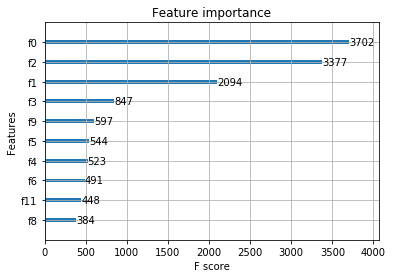

In [156]:
%matplotlib inline
from xgboost import plot_importance
plot_importance(xgb_reg, max_num_features=10)

In [161]:
sorted(zip(processed_train.columns,xgb_reg.feature_importances_),key=lambda x: x[1],reverse=True)

[('business_started_year', 0.21559606),
 ('stock_value', 0.1966688),
 ('investment.amount', 0.1219498),
 ('Total.Population.of.Village', 0.049327355),
 ('MICA', 0.034767922),
 ('Nearest.Statutory.Town..Distance.in.km.', 0.03168132),
 ('District.Head.Quarter...Distance.in.km.', 0.030458331),
 ('Agriculture', 0.028594723),
 ('Avg.Demand.y', 0.0260905),
 ('Credit/Deposit', 0.022363286),
 ('Avg.Demand.x', 0.02148972),
 ('Light.and.Fuel', 0.01921845),
 ('size_medium', 0.011938734),
 ('road_type_Major Road', 0.009434512),
 ('road_type_Village Road', 0.008269757),
 ('size_small', 0.007978569),
 ('market_type_Small Market', 0.00768738),
 ('enterprise_name_Hotelrestaurant', 0.007454429),
 ('market_type_Large Market', 0.0073379534),
 ('road_type_State Highway', 0.007221478),
 ('enterprise_name_Fertilizershop', 0.0055908216),
 ('market_type_Stand Alone', 0.005532584),
 ('enterprise_name_Kirana', 0.005532584),
 ('enterprise_name_Sareeshop', 0.004891969),
 ('enterprise_name_Readymadeclothshop', 0.0